In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
import seaborn as sns

In [177]:
data = pd.read_table("RNALevelDownUpboxplot.txt", sep='\t')

In [178]:
celllines = ['MII', 'zygote', 'early', '2cell', '4cell', '8cell', 'ICM']

whiskerprops = {'linestyle': '--', 'linewidth':1.1, 'color': 'black'}
medianprops = {'linewidth':1 , 'color': 'black', 'drawstyle' : 'steps'}

paintdata_p = []
paintdata_n = []
pvalue = []
for cell in celllines:
    p = data.loc[(data['stage']==cell) & (data['type'] == 'down')]['num'].values
    n = data.loc[(data['stage']==cell) & (data['type'] == 'up')]['num'].values
    stat, pv = stats.ttest_ind(p,n, equal_var = False)
    pvalue.append(round(pv,2))
    paintdata_p.append(p)
    paintdata_n.append(n)
    

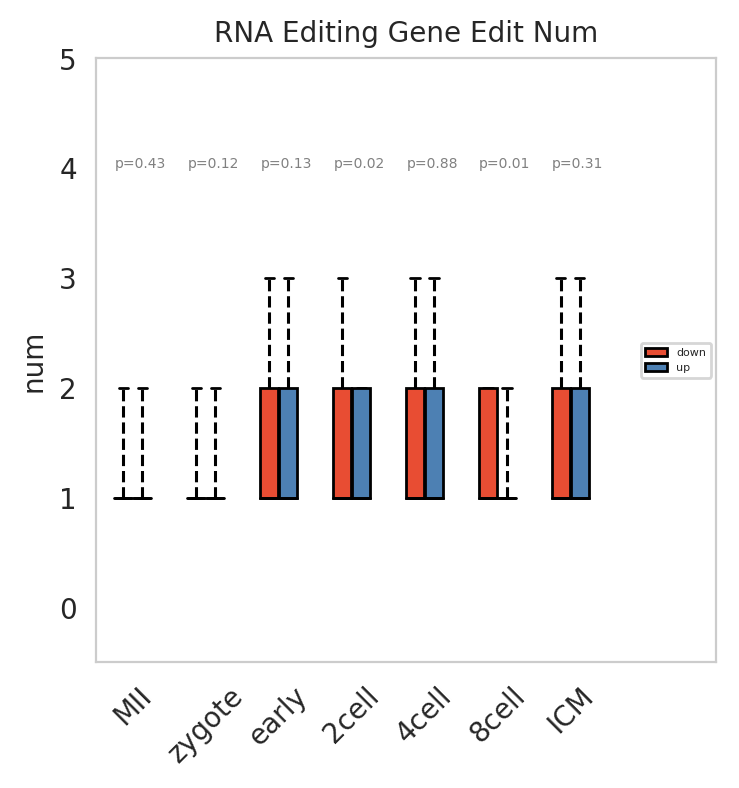

In [181]:
plen = len(paintdata_p)
colorBar1 = [[0.91000,0.3000000000000,0.200] for i in range(plen)]
colorBar2 = [[0.300000000000000,0.500000000000000,0.700] for i in range(plen)]
plt.figure(figsize=(4, 4), dpi=200)

x1 = [i*2-0.26 for i in range(plen)]
x2 = [i*2+0.26 for i in range(plen)]


bp1 = plt.boxplot(paintdata_p, positions=x1, showfliers=False, meanline =False, patch_artist = True, whiskerprops = whiskerprops, medianprops = medianprops,widths = 0.5,whis = [10, 90])
for patch, color in zip(bp1['boxes'], colorBar1):
    patch.set_facecolor(color)
bp2 = plt.boxplot(paintdata_n, positions=x2, showfliers=False, meanline =False, patch_artist = True, whiskerprops = whiskerprops, medianprops = medianprops,widths = 0.5,whis = [10, 90])# labels=labels, 
for patch, color in zip(bp2['boxes'], colorBar2):
    patch.set_facecolor(color)

plt.xticks([i*2 for i in range(plen)],celllines, rotation = 45) 
style=dict(size=5, color='gray')
for i in range(plen):
    plt.text(i*2-0.5, 4, "p="+str(pvalue[i]), **style)

plt.xlim(-1,16)
plt.ylim(-0.5, 5)
plt.title("RNA Editing Gene Edit Num", fontsize=10)
plt.ylabel("num")
plt.grid(False)
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['down', 'up'], loc='center right',prop={'size':4})
plt.savefig("boxplot.png")